In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [2]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至“总通最大值”
data = data.iloc[:, 6:-3]

# 打印数据的前几行
print(data.head()) 

   重量平均值    重量相对偏差  重量标准偏差  重量变异系数  重量最小值  重量最大值  吸阻平均值    吸阻相对偏差  吸阻标准偏差  \
0  0.516  0.006524   0.011   2.202  0.499  0.538  1.275  0.041404   0.048   
1  0.515  0.004573   0.012   2.350  0.482  0.545  1.321  0.006820   0.046   
2  0.507  0.011032   0.012   2.316  0.477  0.524  1.291  0.029375   0.049   
3  0.507  0.011032   0.013   2.549  0.479  0.529  1.296  0.025616   0.059   
4  0.509  0.007131   0.009   1.863  0.486  0.531  1.350  0.014984   0.058   

   吸阻变异系数  ...  嘴通平均值  嘴通标准偏差  嘴通变异系数  嘴通最小值  嘴通最大值  总通平均值  总通标准偏差  总通变异系数  \
0   3.784  ...   38.0   2.073   5.453   33.7   41.4   44.6   2.006   4.502   
1   3.465  ...   36.1   2.202   6.105   31.3   39.6   43.0   2.106   4.904   
2   3.802  ...   34.8   1.802   5.184   30.9   37.4   42.0   1.810   4.308   
3   4.587  ...   36.3   1.884   5.196   31.4   41.4   42.8   2.027   4.739   
4   4.322  ...   36.3   1.598   4.407   33.1   39.9   42.0   1.577   3.751   

   总通最小值  总通最大值  
0   40.1   48.0  
1   37.8   47.0  
2   38.4   45.

In [3]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在缺失值，打印缺失值的索引
        print("缺失值的索引：")
        print(df[df.isnull().any(axis=1)].index.tolist())

        print("数据中存在缺失值，正在处理...")

        df = df.fillna(df.mean())  # 用均值填充缺失值
        print("缺失值已处理。")
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

data = preprocess_data(data)

缺失值的索引：
[592, 593, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]
数据中存在缺失值，正在处理...
缺失值已处理。
异常值已处理。


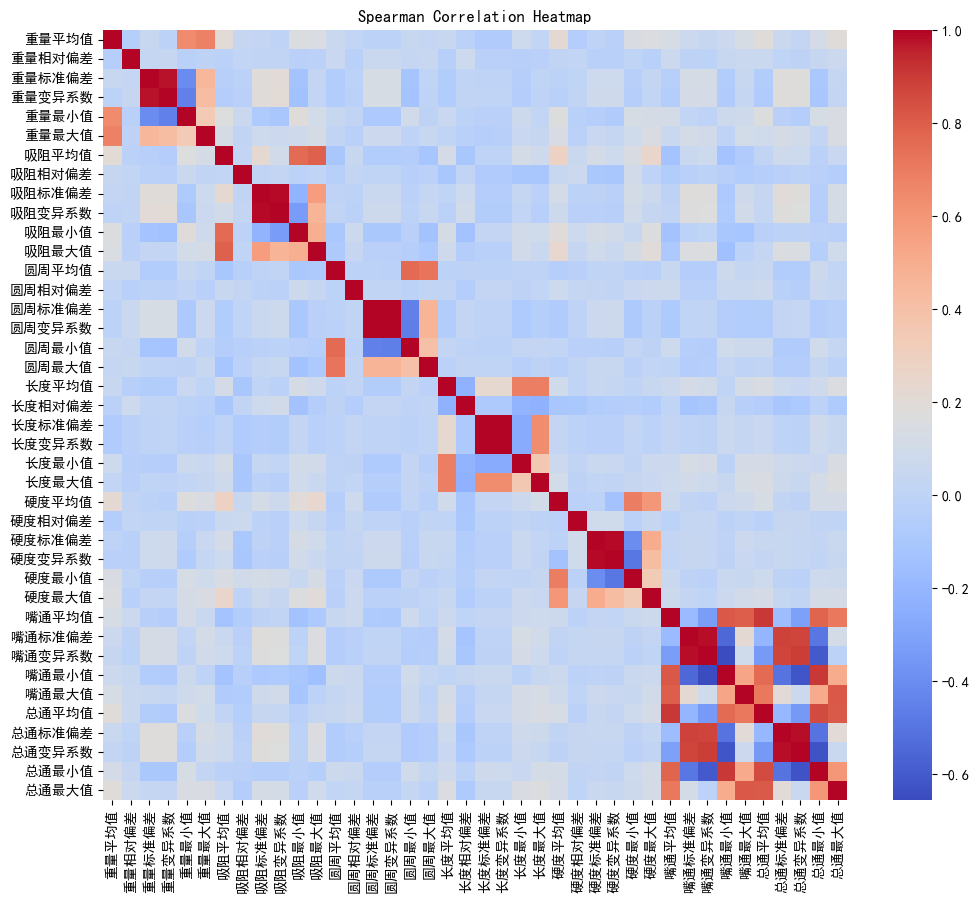

In [4]:
# 1. 计算Spearman相关系数矩阵
correlation_matrix = data.corr(method='spearman')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [5]:
# 选择所有指标的平均值进行分析，即第1、7、13、19、25、31或36列
selected_data = data.iloc[:, [0, 6, 12, 18, 24, 30]]
print("选择后的数据形状:", selected_data.shape)

选择后的数据形状: (1237, 6)


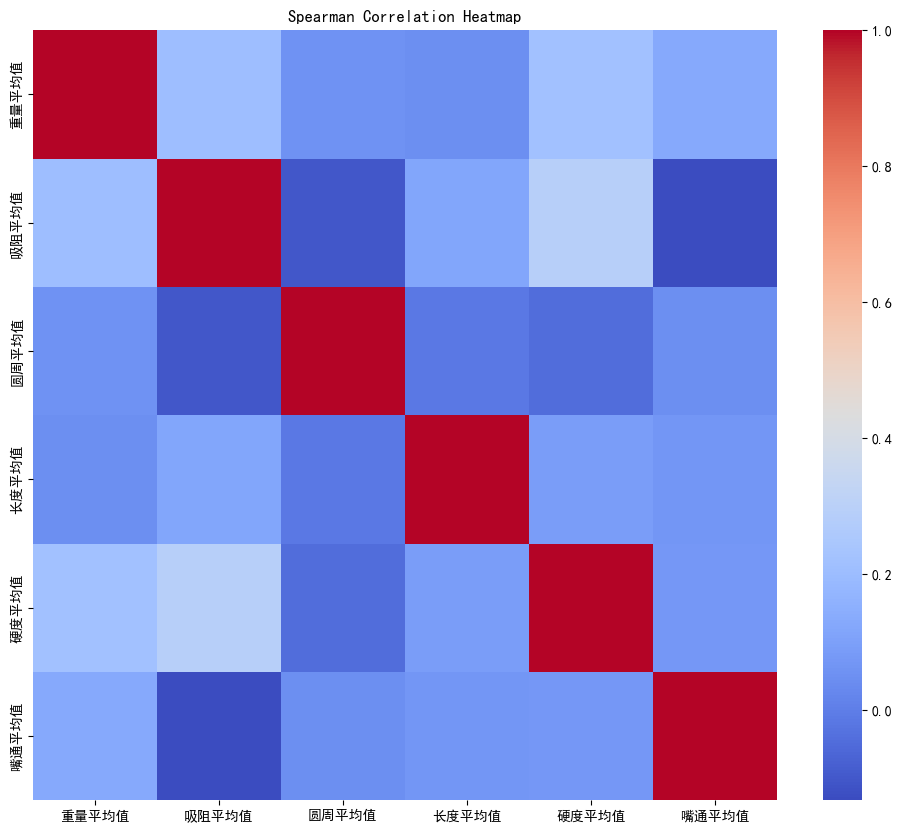

In [6]:
# 1. 计算Spearman相关系数矩阵
correlation_matrix = selected_data.corr(method='spearman')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

## 利用多层感知机进行回归预测

In [7]:
# 最后一列设为预测值
from sklearn.model_selection import train_test_split
x, y = selected_data.iloc[:, :-1], selected_data.iloc[:, -1]

In [8]:
# 将训练集和测试集划分为80%和20%
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(989, 5) (989,)
(248, 5) (248,)


In [ ]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
print("原始数据的统计信息:")
print(x_train.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_x_train = scaler_x.fit_transform(x_train)
# scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

# 为了方便查看，可以将其转换回DataFrame
scaled_x_pd = pd.DataFrame(scaled_x_train, columns=x_train.columns)
# scaled_y_pd = pd.DataFrame(scaled_y_train, columns=[y_train.name])

print("\n-------------------------------------------------")
print("\n标准化后数据的统计信息:")
print(scaled_x_pd.describe())
# print(scaled_y_pd.describe())

原始数据的统计信息:
            重量平均值       吸阻平均值       圆周平均值       长度平均值       硬度平均值
count  989.000000  989.000000  989.000000  989.000000  989.000000
mean     0.512730    1.330534   17.126836   89.976152   58.504279
std      0.004709    0.033947    0.031777    0.089082    1.197616
min      0.501000    1.172553   17.016400   89.583200   54.200000
25%      0.510000    1.311000   17.110000   89.930000   57.700000
50%      0.512000    1.331000   17.130000   89.990000   58.500000
75%      0.515600    1.353000   17.150000   90.030000   59.200000
max      0.531000    1.446000   17.220000   90.230000   63.200000

-------------------------------------------------

标准化后数据的统计信息:
              重量平均值         吸阻平均值         圆周平均值         长度平均值         硬度平均值
count  9.890000e+02  9.890000e+02  9.890000e+02  9.890000e+02  9.890000e+02
mean  -2.439841e-14  1.345289e-15  9.054211e-15 -5.035675e-14 -3.682034e-16
std    1.000506e+00  1.000506e+00  1.000506e+00  1.000506e+00  1.000506e+00
min   -2.492208e+00 -4.656

In [16]:
#----------------------开始训练----------------------
mlp = MLPRegressor(hidden_layer_sizes=(16, 8, 4), max_iter=4000, activation='logistic',solver='adam', early_stopping=True, random_state=42)

mlp.fit(scaled_x_train, y_train)

#----------------------训练已完成----------------------
print("训练完成")

训练完成


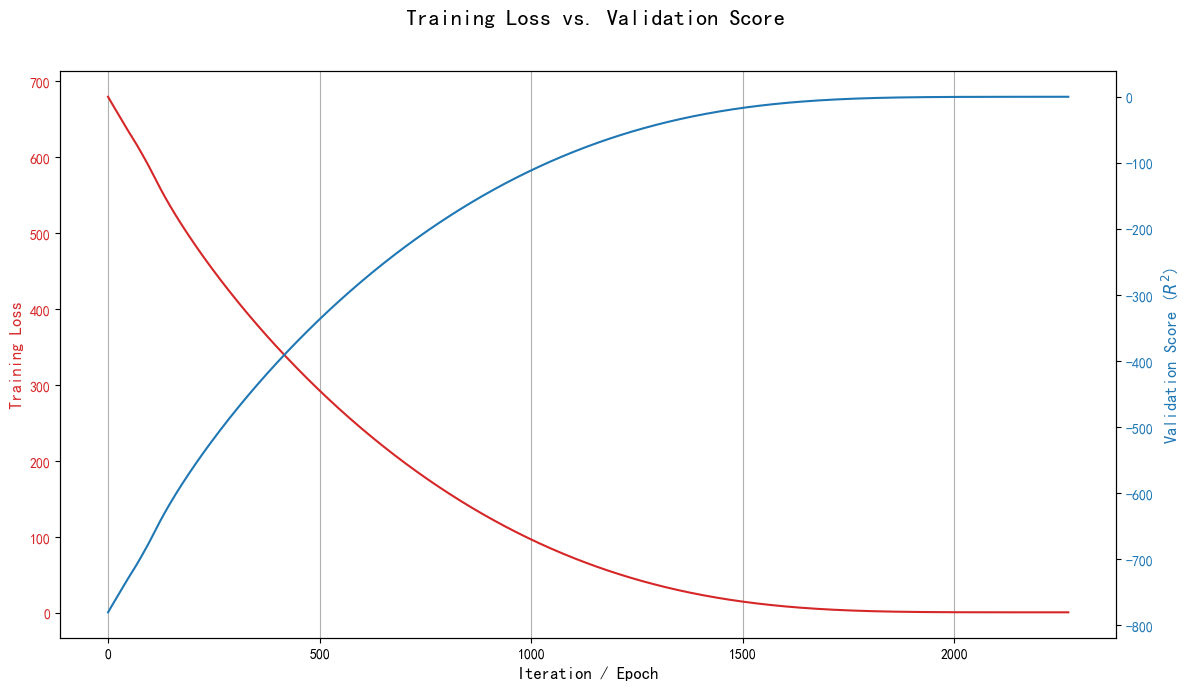

In [17]:
# --- 可视化训练损失和验证得分 ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# 绘制训练损失曲线 (使用左侧Y轴)
color = 'tab:red'
ax1.set_xlabel('Iteration / Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', color=color, fontsize=12)
ax1.plot(mlp.loss_curve_, color=color, label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, axis='x')

# 创建第二个Y轴，用于绘制验证得分
ax2 = ax1.twinx()  
color = 'tab:blue'
# 注意：validation_scores_ 是得分(如R^2)，不是损失。得分越高越好。
ax2.set_ylabel('Validation Score ($R^2$)', color=color, fontsize=12)  
ax2.plot(mlp.validation_scores_, color=color, label='Validation Score')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Training Loss vs. Validation Score', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


Mean Squared Error: 1.6239679934537858
R^2 Score: -1.724631640187546e-05


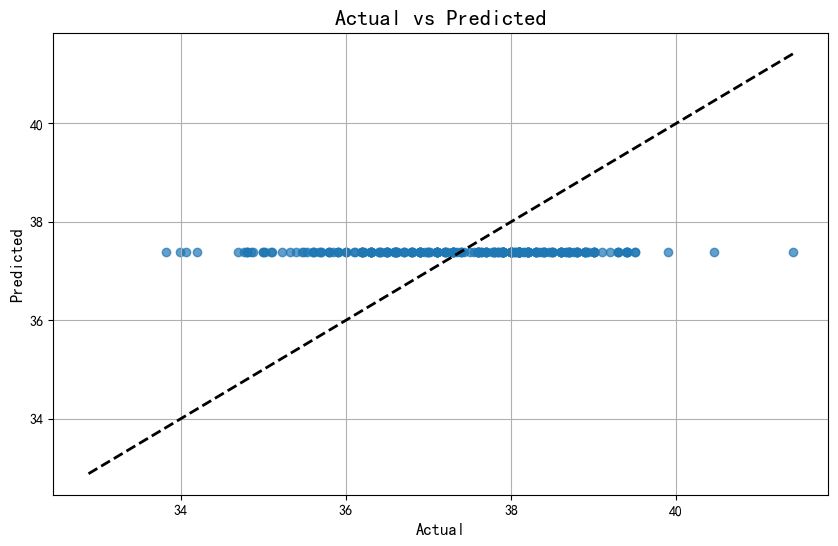

In [18]:
# 在测试集上进行预测
scaled_x_test = scaler_x.transform(x_test)
y_pred = mlp.predict(scaled_x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Actual vs Predicted", fontsize=16)
plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.grid(True)
plt.show()

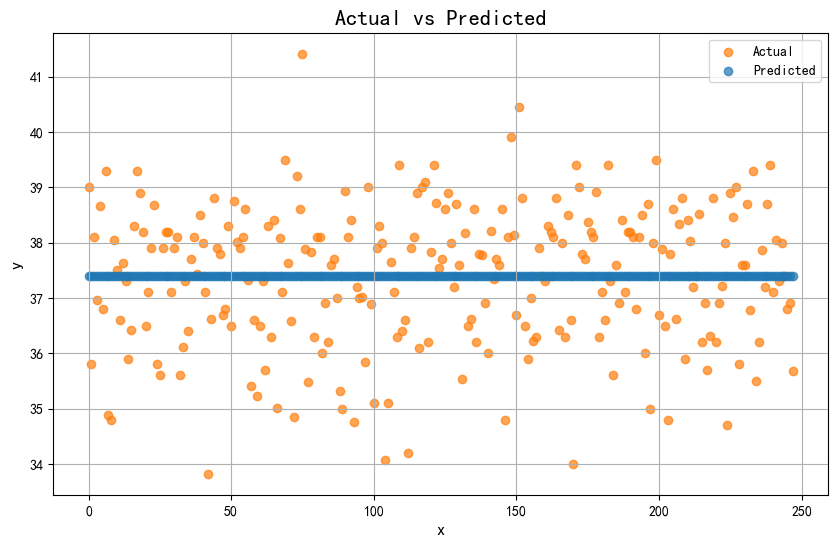

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.7, label="Actual", color='tab:orange')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.7, label="Predicted", color='tab:blue')
plt.title("Actual vs Predicted", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()